In [1]:
#https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
import os
from datetime import datetime 
import warnings
%matplotlib inline 

warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'd:\\AI Local\\practice_projects\\project_files'

In [3]:
dfStock=pd.read_csv('data\\all_stocks_5yr.csv',delimiter=',',on_bad_lines='skip')


In [4]:
dfStock.head(5
             )

,date,open,high,low,close,volume,Name
0,08/02/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11/02/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12/02/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13/02/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14/02/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
dfStock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
print(dfStock.shape),len(dfStock),dfStock.isna().sum()



(619040, 7)


(None,
 619040,
 date       0
 open      11
 high       8
 low        8
 close      0
 volume     0
 Name       0
 dtype: int64)

In [7]:
#df.date.max(),df.date.min(),len(df)
dfStock['date'] = pd.to_datetime(dfStock['date'],dayfirst=True) #,format="MM/dd/yyyy"
                              
dfStock.info()
#df['new_date'] = pd.to_datetime(df['date'])

#df("new_date")=pd.to_datetime(df['date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [8]:
dfStock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [9]:
df=dfStock[(dfStock['Name']=='AAL') & (dfStock['open'] >50 )]

df

,date,open,high,low,close,volume,Name
460,2014-12-05,50.090,51.75,50.01,51.01,15588179,AAL
461,2014-12-08,50.440,51.32,50.15,50.82,16167321,AAL
465,2014-12-12,51.675,51.70,49.90,49.97,15364034,AAL
466,2014-12-15,50.210,51.32,49.32,50.84,15368535,AAL
467,2014-12-16,51.010,51.15,47.68,47.96,22053666,AAL
...,...,...,...,...,...,...,...
1253,2018-01-31,53.080,54.71,53.00,54.32,5962937,AAL
1254,2018-02-01,54.000,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.490,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.990,52.39,49.75,49.76,6878284,AAL


In [10]:
print(df.describe())
df.info()

                                date        open        high         low  \
count                            140  140.000000  140.000000  140.000000   
mean   2016-10-15 15:15:25.714285824   52.416357   53.017079   51.635047   
min              2014-12-05 00:00:00   50.090000   50.220000   47.660000   
25%              2015-03-17 18:00:00   50.992500   51.642500   50.290000   
50%              2017-07-20 12:00:00   52.065000   52.680000   51.480000   
75%              2017-12-14 06:00:00   53.275000   53.902500   52.435000   
max              2018-02-07 00:00:00   58.790000   59.080000   57.800000   
std                              NaN    1.853978    1.895723    2.009755   

            close        volume  
count  140.000000  1.400000e+02  
mean    52.250179  9.207910e+06  
min     47.960000  1.845331e+06  
25%     50.835000  4.055861e+06  
50%     52.030000  6.949853e+06  
75%     53.042500  1.113223e+07  
max     58.470000  1.377672e+08  
std      2.090332  1.233985e+07  
<class 'p

In [11]:
dfStock.groupby('Name').describe().T

Name                                      A                            AAL  \
date   count                           1259                           1259   
       mean   2015-08-09 05:44:16.393963264  2015-08-09 05:44:16.393963264   
       min              2013-02-08 00:00:00            2013-02-08 00:00:00   
       25%              2014-05-10 12:00:00            2014-05-10 12:00:00   
       50%              2015-08-10 00:00:00            2015-08-10 00:00:00   
       75%              2016-11-05 12:00:00            2016-11-05 12:00:00   
       max              2018-02-07 00:00:00            2018-02-07 00:00:00   
       std                              NaN                            NaN   
open   count                         1259.0                         1259.0   
       mean                       49.187863                      38.390495   
       min                            33.18                          13.14   
       25%                           41.515                         34.205   
       50%                            46.64                          40.93   
       75%                           56.435                         46.565   
       max                            74.48                          58.79   
       std                         9.244798                      10.967086   
high   count                         1259.0                         1259.0   
       mean                       49.600059                      38.955554   
       min                            34.06                          13.42   
       25%                            41.87                          34.93   
       50%                             47.0                        41.4295   
       75%                           56.935                        47.1875   
       max                             75.0                          59.08   
       std                         9.264168                       11.07365   
low    count                         1259.0                         1259.0   
       mean                       48.782026                      37.825605   
       min                           33.115                           12.7   
       25%                            41.26                          33.69   
       50%                           46.341                        40.2099   
       75%                           56.025                          45.99   
       max                             74.3                           57.8   
       std                         9.197698                      10.843652   
close  count                         1259.0                         1259.0   
       mean                       49.202025                      38.393252   
       min                            33.37                          13.02   
       25%                            41.56                          34.33   
       50%                             46.7                          40.87   
       75%                           56.495                         46.535   
       max                            74.82                          58.47   
       std                         9.229804                      10.957636   
volume count                         1259.0                         1259.0   
       mean                  2338038.906275                 9390321.324067   
       min                         532863.0                      1352400.0   
       25%                        1533017.5                      5696393.0   
       50%                        2003109.0                      8111323.0   
       75%                        2718401.0                     11188535.0   
       max                       18146408.0                    137767165.0   
       std                   1400160.998314                 6899304.790121   

Name                                    AAP                           AAPL  \
date   count                           1259                           1259   
       mean   2015-08

In [12]:

'''
If you want to do fetch data of two columns, you need to look at using the loc and iloc functions.
loc: label-based
iloc: integer position-based

'''

df=dfStock.loc[0:50000,['Name','date','close']]# filering out first 500k rows and three coulmns into df
#dataframe.filter(items, like, regex, axis); items and like are mutually excluisive

dfStock.filter(items=['Name','close']).query('Name =="AAL"')

,Name,close
0,AAL,14.75
1,AAL,14.46
2,AAL,14.27
3,AAL,14.66
4,AAL,13.99
...,...,...
1254,AAL,53.88
1255,AAL,52.10
1256,AAL,49.76
1257,AAL,51.18


In [13]:
df.query('close == 52')
df.query('close > 52')

df.query('Name == "AAL"')


,Name,date,close
0,AAL,2013-02-08,14.75
1,AAL,2013-02-11,14.46
2,AAL,2013-02-12,14.27
3,AAL,2013-02-13,14.66
4,AAL,2013-02-14,13.99
...,...,...,...
1254,AAL,2018-02-01,53.88
1255,AAL,2018-02-02,52.10
1256,AAL,2018-02-05,49.76
1257,AAL,2018-02-06,51.18


In [14]:
pd.crosstab(df["Name"],df.close).head()

close,1.62,1.66,1.67,1.70,1.71,1.72,1.73,1.74,1.75,1.76,...,1362.54,1377.95,1390.00,1402.05,1416.78,1417.68,1429.95,1437.82,1442.84,1450.89
Name,,,,,,,,,,,,,,,,,,,,,
AAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#mask = (df['InsertedDates'] > start_date) & (df['InsertedDates'] <= end_date)

df["date"].min(),df["date"].max(),len(df)

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'), 50001)

In [16]:

#df2=df[(df["date"] >'31/12/2015')] # & (df["date"] <= '10/01/2016')]
dfsmall=df[(df["date"]>='2013-02-08') & (df["date"] <='2016-02-28')].copy()
dfsmall


,Name,date,close
0,AAL,2013-02-08,14.75
1,AAL,2013-02-11,14.46
2,AAL,2013-02-12,14.27
3,AAL,2013-02-13,14.66
4,AAL,2013-02-14,13.99
...,...,...,...
49668,ANSS,2016-02-22,88.52
49669,ANSS,2016-02-23,86.49
49670,ANSS,2016-02-24,86.54
49671,ANSS,2016-02-25,84.22


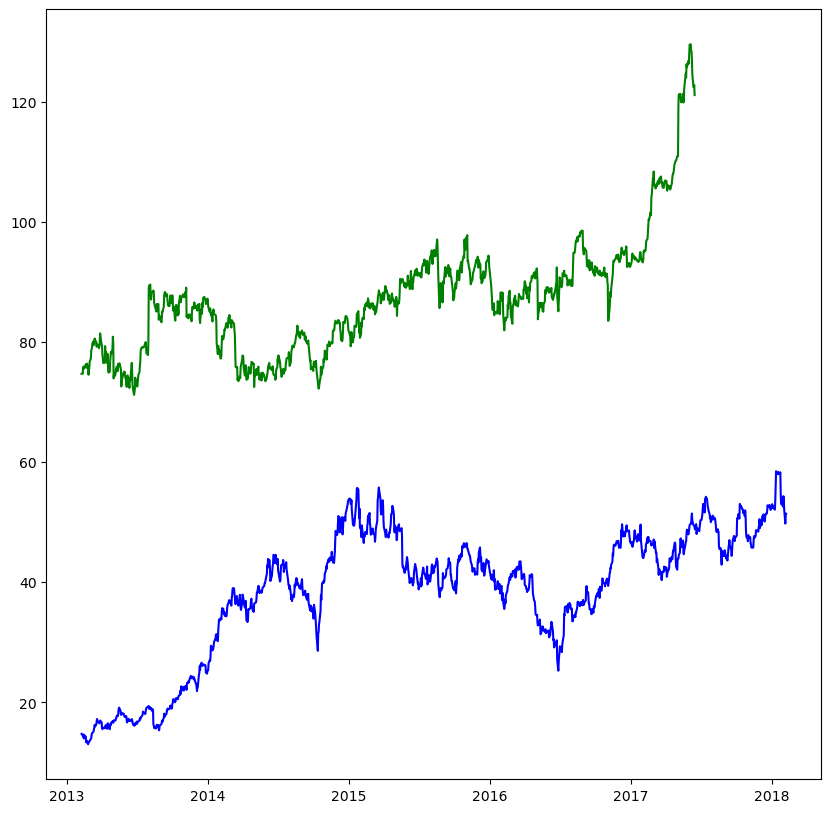

48911     76.28
48912     76.09
48914     76.38
48919     76.68
48920     77.23
          ...  
49996    124.52
49997    122.40
49998    122.47
49999    122.74
50000    121.08
Name: close, Length: 946, dtype: float64

In [17]:

fig,ax= plt.subplots(figsize=(10,10)) # returns a figure and a set of subplots 

#ts=pd.Series(df["close"],index=df["date"])
#ts.cumsum() - runnng total (row or column wise - axis 0 or axis 1)
df1=df.query('Name =="AAL"',inplace=False)
ax.plot(df1["date"],df1["close"],color="blue")

df2=df.query('Name =="ANSS"',inplace=False)
ax.plot(df2["date"],df2["close"],color="green")
plt.show()

scrip="ANSS"

df3=df.query("Name== @scrip")

df3[df3["close"]>76].close

In [18]:
names=df.Name.unique()[0:10]
names

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM'], dtype=object)

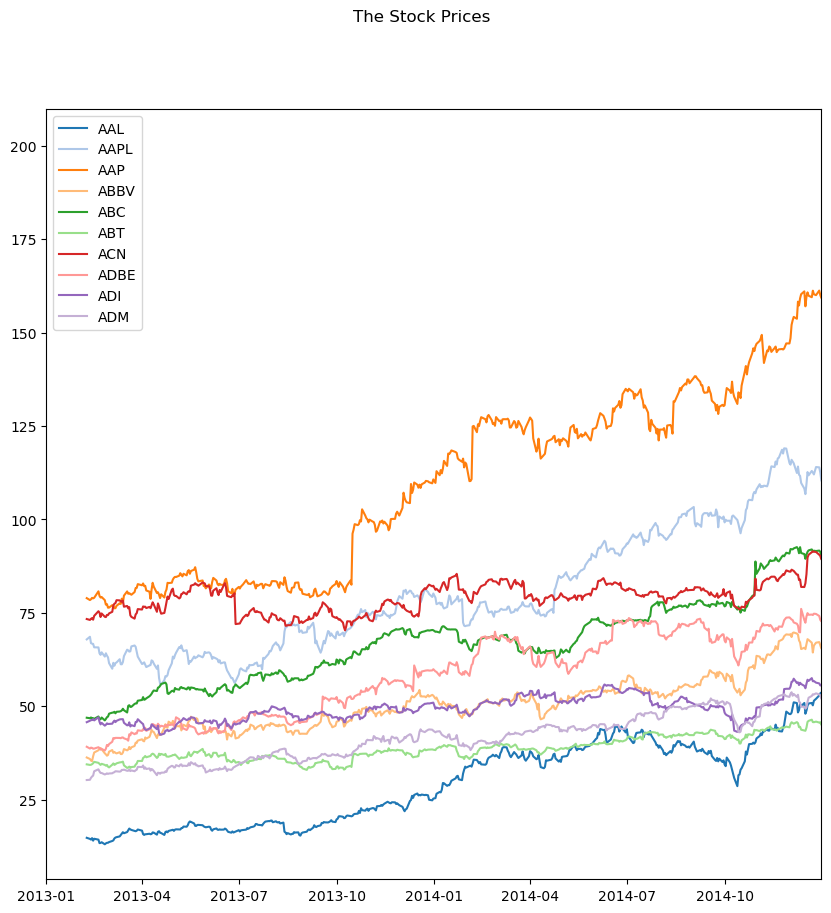

In [19]:

fig,ax= plt.subplots(figsize=(10,10))

ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])



for i in names:
    #print(i)
    #print(dfsmall.query("Name == @i")),print(dfsmall.query("Name == @i").close)
    dfscrip=dfsmall.query("Name== @i")
    ax.plot(dfscrip.date,dfscrip.close,label=i)
   # ax.text(dfscrip.date[-1],dfscrip.close[-1], i)
    


fig.suptitle("The Stock Prices")
ax.set_xlim(np.datetime64("2013-01-01"),np.datetime64("2014-12-31"))
plt.legend()
plt.show()


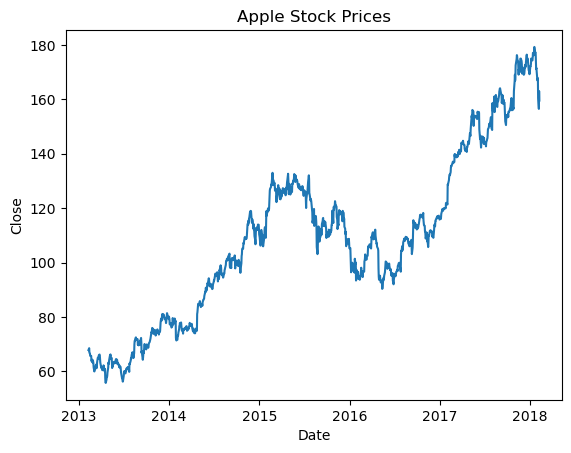

In [20]:
apple = dfStock[dfStock['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [21]:
close_data = apple.filter(['close'])
dataset = close_data.values #return a numpy representation of data fram
training = int(np.ceil(len(dataset) * .95))
print(training),print(len (dataset) * .95),print(len(close_data))

1197
1196.05
1259


(None, None, None)

```python
MinMaxScaler
```    
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005] .

In [22]:
print(close_data.head()),print(dataset[0:5])


        close
1259  67.8542
1260  68.5614
1261  66.8428
1262  66.7156
1263  66.6556
[[67.8542]
 [68.5614]
 [66.8428]
 [66.7156]
 [66.6556]]


(None, None)

In [23]:
import sklearn 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
len(train_data),len(train_data)+60,y_train[0]

(1197, 1257, np.float64(0.0788255618161805))


28-12-24
#I have stopped the project here because the project guide became very confusing about data

30-12-24
#started another project with similar goal:
https://www.udemy.com/course/machine-learning-for-stock-trading-python/learn/lecture/32372380#overview

In [25]:
#pip install yfinance
#pip install yahoofinancials

In [26]:
import yfinance as yf
from yahoofinancials import YahooFinancials



In [27]:
df=yf.download("AAPL",start="2010-01-01", end=datetime.today(),progress=False)

In [28]:
print(datetime.today(), "--", datetime.now())
df.head(), df["Close"],df.index


2025-01-02 01:17:36.695017 -- 2025-01-02 01:17:36.695016


(Price          Close      High       Low      Open     Volume
 Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
 Date                                                         
 2010-01-04  6.447412  6.462175  6.398306  6.429939  493729600
 2010-01-05  6.458559  6.495012  6.424516  6.465187  601904800
 2010-01-06  6.355827  6.484167  6.349199  6.458559  552160000
 2010-01-07  6.344077  6.386857  6.297983  6.379325  477131200
 2010-01-08  6.386254  6.386857  6.298285  6.335642  447610800,
 Ticker            AAPL
 Date                  
 2010-01-04    6.447412
 2010-01-05    6.458559
 2010-01-06    6.355827
 2010-01-07    6.344077
 2010-01-08    6.386254
 ...                ...
 2024-12-24  258.200012
 2024-12-26  259.019989
 2024-12-27  255.589996
 2024-12-30  252.199997
 2024-12-31  250.419998
 
 [3774 rows x 1 columns],
 DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
                '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
           

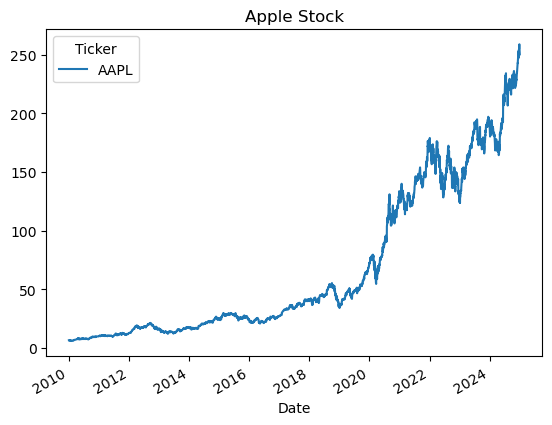

In [29]:
df.plot(y="Close",title="Apple Stock") #date is index which is fetched with "Close" column
plt.show()

In [30]:
import pandas-ta as ta
#pip install pandas_ta


SyntaxError: invalid syntax (3419529971.py, line 1)

In [ ]:
np.__version__

NameError: name 'np' is not defined

In [11]:

#pip install pandas_ta
#setx PATH "%PATH%;d:\ai local\practice_projects\practice_env_3.10\lib\site-packages"
import pandas_ta



ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

<b> Creating Technical Analysis Parameters </b>

In [ ]:
df["RSI(2)"]=ta.rs

In [1]:
import numpy as np